<a href="https://colab.research.google.com/github/arpitpatel1501/Intresting-books-data-analysis/blob/main/Intresting_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.bornontario.ca/en/about-born/resources/Images/books-1204029_1920.jpg)


# Introduction

There are many features that make up a good book, but what are the features which affect most the goodness of a programming or computer science book?
In this kernel, we will dive into 270 examples of books and try to understand what makes a book score high review scores, what affects the book's price, and are there any underlying patterns we are missing and can unraveling them help book writers make better books?

## Problem Statement

- What features are correlated with the price features and the score feature

- How the number of pages affect the rest of our features.

- Are any programing languages come up more frequently?

- Can we divide the books by categories and understand what category costs more or has higher review scores.


## Feature Engineering Goals
- Extract description text features like text length , average word length, programing language, etc.
- Extract book title text features like text length, average word length, programing language, etc.

## Prediction Goals
- Predict the number of potential reviews for a book  
- Predict a book's rating 
- Predict a book's price


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')

In [ ]:
! git clone "https://github.com/arpitpatel1501/Intresting-books-data-analysis"

fatal: destination path 'Intresting-books-data-analysis' already exists and is not an empty directory.


In [ ]:
b_data = pd.read_csv('/content/Intresting-books-data-analysis/prog_book.csv')
b_data.head(3)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647


# Feature Engineering

In [ ]:
def average_word_length(sir):
    splited = sir.split(' ')
    aux = 0
    for word in splited:
        aux += len(word)
    aux/=len(splited) 
    return aux

def number_of_words(sir):
    splited = sir.split(' ')
    return len(splited)


In [ ]:
b_data['Title_Average_Word_Length'] = b_data.Book_title.apply(average_word_length)
b_data['Title_Number_Of_Words'] = b_data.Book_title.apply(number_of_words)
b_data['Description_Average_Word_Length'] = b_data.Description.apply(average_word_length)
b_data['Description_Number_Of_Words'] = b_data.Description.apply(number_of_words)


In [ ]:
lencoder = LabelEncoder()
lencoder.fit(b_data.Type)
b_data.Type = lencoder.transform(b_data.Type)

In [ ]:
b_data.Reviews = b_data.Reviews.apply(lambda x : int(x.replace(',','')))

In [ ]:
b_data.head(3)


,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price,Title_Average_Word_Length,Title_Number_Of_Words,Description_Average_Word_Length,Description_Number_Of_Words
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,1,9.323529,4.50,4,5.486486,37
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,1,11.000000,4.75,8,5.258065,62
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,2,11.267647,6.50,6,6.290909,55


# EDA (Exploratory data analysis)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


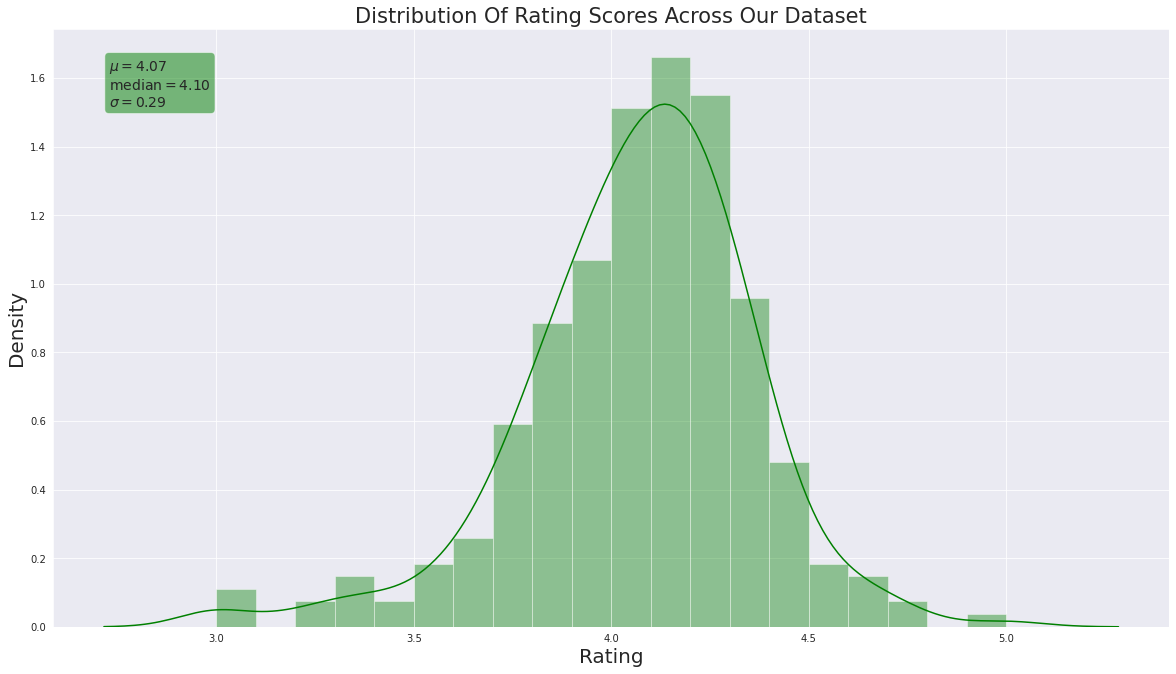

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.distplot(b_data.Rating,label="Ratings",color='green')
ax.set_xlabel("Rating",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
textstr = '\n'.join(
        (r'$\mu=%.2f$' % (b_data.Rating.mean(),), r'$\mathrm{median}=%.2f$' % (b_data.Rating.median(),),
         r'$\sigma=%.2f$' % (b_data.Rating.std(),)))
props = dict(boxstyle='round', facecolor='green', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

ax.set_title('Distribution Of Rating Scores Across Our Dataset',fontsize=21)
plt.show()

Intersting! We can see that our ratings are normally distributed around 4.0, unlike some datasets where the ratings are usually skewed towards low scores or high scores our sample population is normally distributed which is good news for our future modeling.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


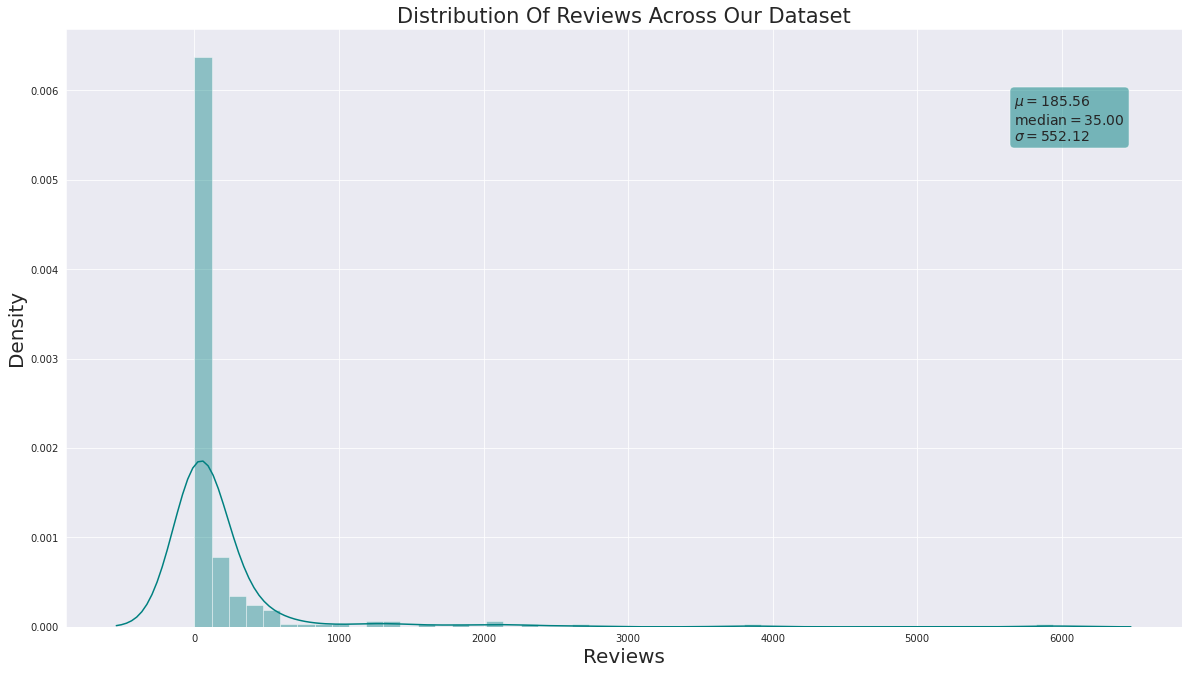

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.distplot(b_data.Reviews,label="Reviews",color='teal')
ax.set_xlabel("Reviews",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
textstr = '\n'.join(
        (r'$\mu=%.2f$' % (b_data.Reviews.mean(),), r'$\mathrm{median}=%.2f$' % (b_data.Reviews.median(),),
         r'$\sigma=%.2f$' % (b_data.Reviews.std(),)))
props = dict(boxstyle='round', facecolor='teal', alpha=0.5)
ax.text(0.85, 0.85, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='center', bbox=props)

ax.set_title('Distribution Of Reviews Across Our Dataset',fontsize=21)
plt.show()

### Unlike our ratings, the number of reviews is distributed almost exponentially, we can clearly see that the massive skews is caused by outliers, we will perform a logarithmic transformation of this feature in order to rebalance our data in comparisons to outliers.

In [ ]:
b_data.Reviews = b_data.Reviews.replace(0,1)
b_data.Reviews = np.log(b_data.Reviews)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


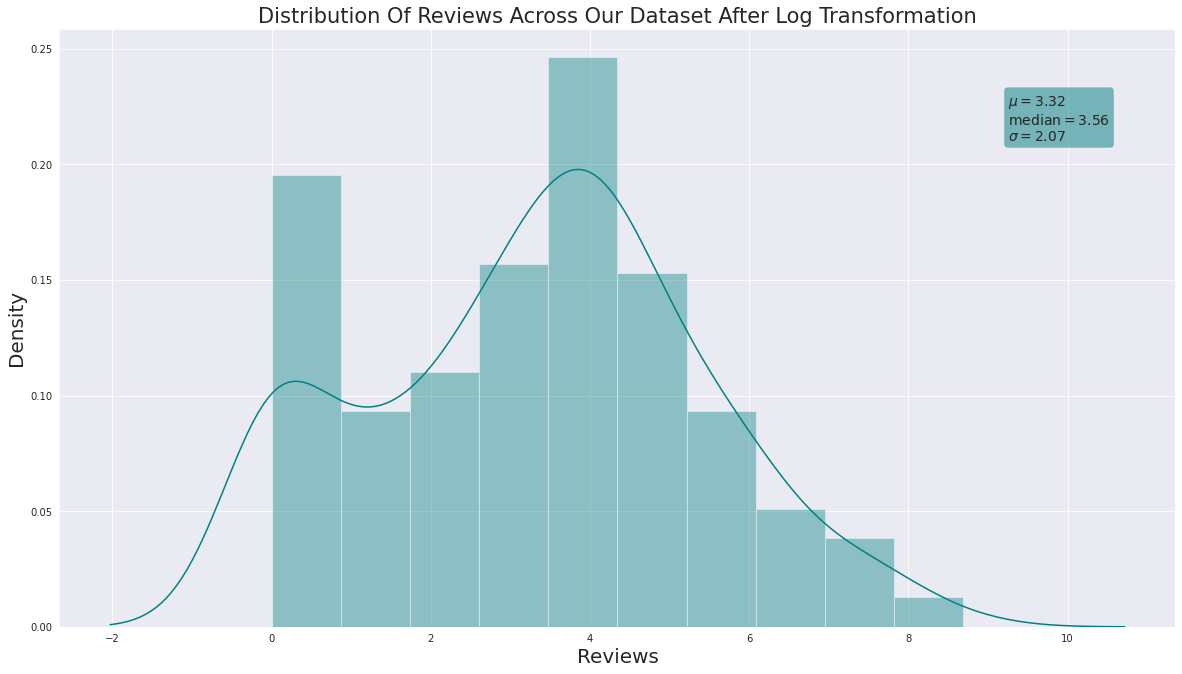

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.distplot(b_data.Reviews,label="Reviews",color='teal')
ax.set_xlabel("Reviews",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
textstr = '\n'.join(
        (r'$\mu=%.2f$' % (b_data.Reviews.mean(),), r'$\mathrm{median}=%.2f$' % (b_data.Reviews.median(),),
         r'$\sigma=%.2f$' % (b_data.Reviews.std(),)))
props = dict(boxstyle='round', facecolor='teal', alpha=0.5)
ax.text(0.85, 0.85, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='center', bbox=props)

ax.set_title('Distribution Of Reviews Across Our Dataset After Log Transformation',fontsize=21)
plt.show()

### After performing a logarithmic transformation we are left with a fairly normal distribution where our mean and median are almost the same as well as a fairly small standard deviation, although we can see two picks which suggest that although the average logarithmic scale number of reviews is 3.3 a large portion of the books have 0 reviews.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


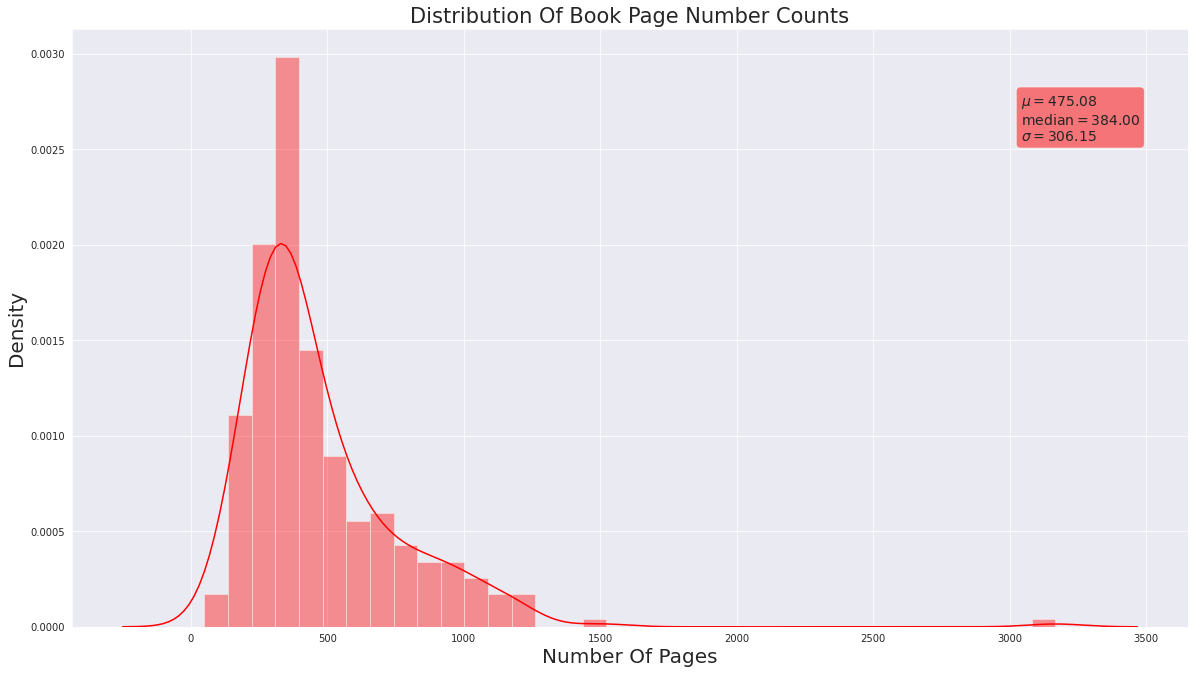

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.distplot(b_data.Number_Of_Pages,label="Number_Of_Pages",color='red')
ax.set_xlabel("Number Of Pages",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
textstr = '\n'.join(
        (r'$\mu=%.2f$' % (b_data.Number_Of_Pages.mean(),), r'$\mathrm{median}=%.2f$' % (b_data.Number_Of_Pages.median(),),
         r'$\sigma=%.2f$' % (b_data.Number_Of_Pages.std(),)))
props = dict(boxstyle='round', facecolor='red', alpha=0.5)
ax.text(0.85, 0.85, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='center', bbox=props)

ax.set_title('Distribution Of Book Page Number Counts',fontsize=21)
plt.show()

### Even though we can see that we have a few outliers the average number of pages is around 475 but our median is 384 which is much more informative taken in mind our outliers.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distibution Of Different Book Types In Our Data')

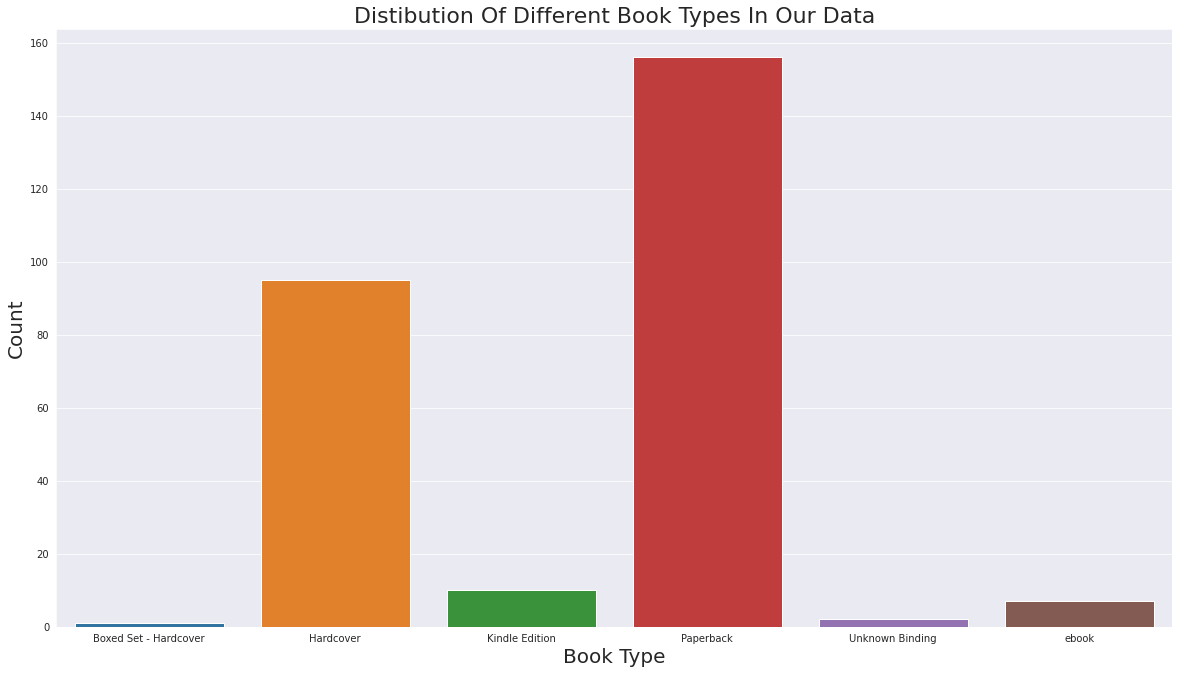

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.countplot(b_data.Type)
ax.set_xticklabels(lencoder.inverse_transform([0,1,2,3,4,5]))
ax.set_xlabel("Book Type",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.set_title('Distibution Of Different Book Types In Our Data',fontsize=22)

### Most of the books in our dataset are Paperback which is somewhat surprising taken in mind that we have so many alternatives for reading books using our phones and etc but still most of the books in our data are paperback.This may also suggest that most of these books are of older releases.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


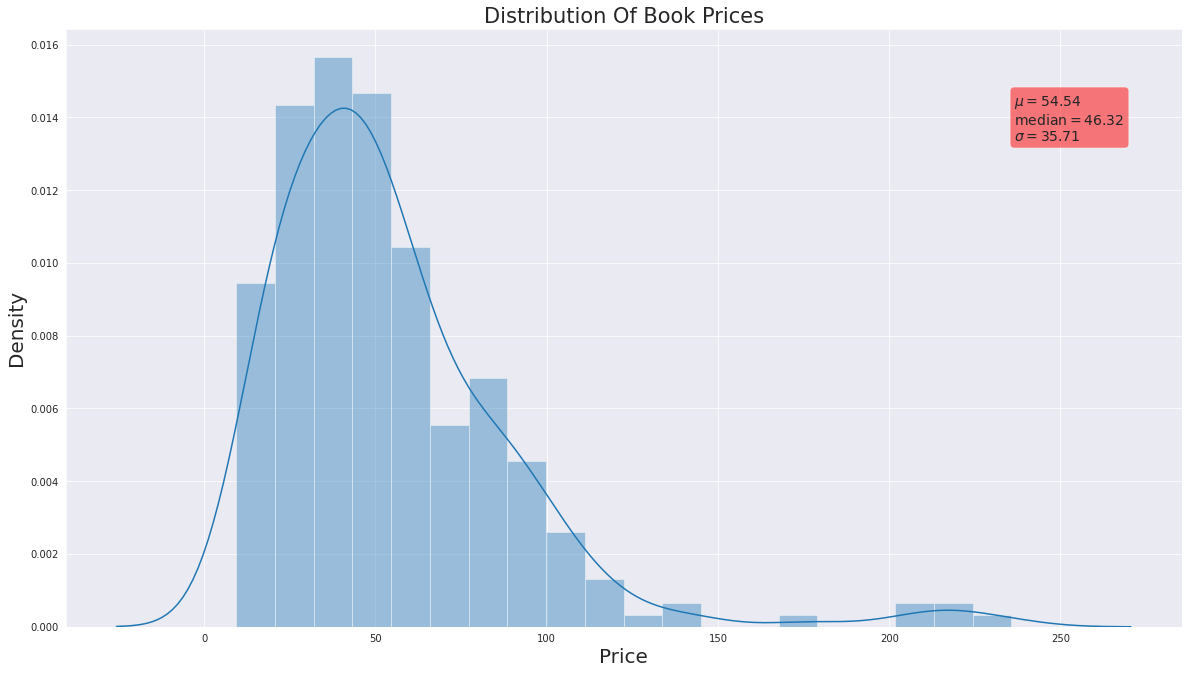

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.distplot(b_data.Price,label="Price")
ax.set_xlabel("Price",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
textstr = '\n'.join(
        (r'$\mu=%.2f$' % (b_data.Price.mean(),), r'$\mathrm{median}=%.2f$' % (b_data.Price.median(),),
         r'$\sigma=%.2f$' % (b_data.Price.std(),)))
props = dict(boxstyle='round', facecolor='red', alpha=0.5)
ax.text(0.85, 0.85, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='center', bbox=props)

ax.set_title('Distribution Of Book Prices',fontsize=21)
plt.show()

### As with the other features we have a few outliers in the price range of our books but if we ignore the outliers we can see our distribution is centered around 46 USD and the distribution curve is quite narrow meaning that our standard deviation around the mean price is fairly low when ignoring the outliers.

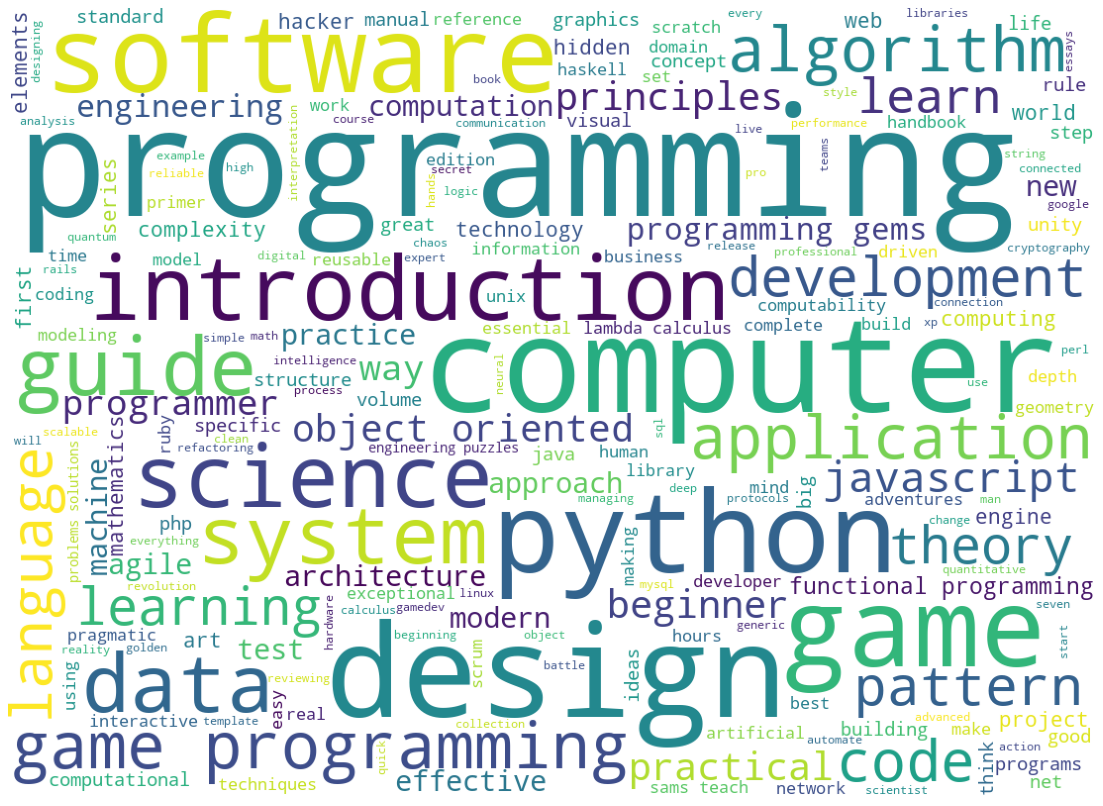

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import re

stopwords = list(STOPWORDS)

title_w = ''

for word in b_data.Book_title:
    word = word.lower()
    splited = re.findall(r'\b[A-Za-z]+\b',word)
    splited = [w for w in splited if w not in stopwords]
    title_w += ' '.join(splited)+ ' '


wordcloud = WordCloud(width = 1100, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(title_w) 
  
# plot the WordCloud image                        
plt.figure(figsize = (18, 11), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Not very surprising but we can see that the most common words in our book titles are programing related together with words like Introduction and Guide.

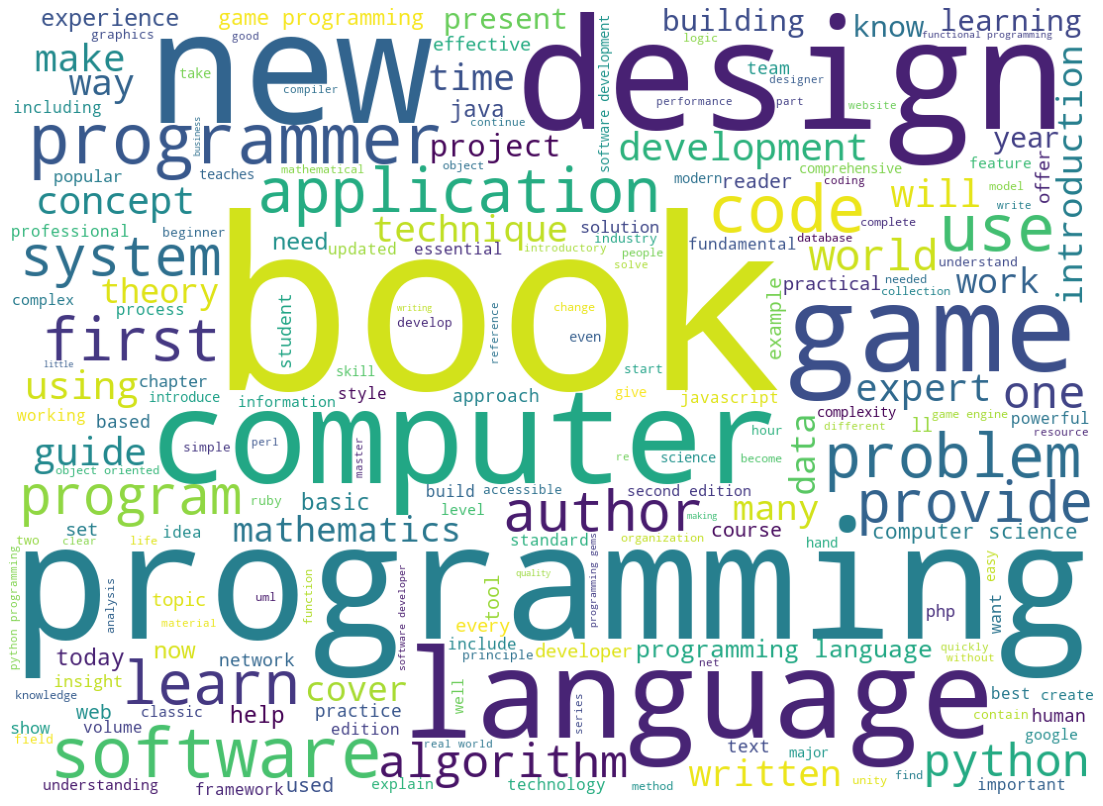

In [ ]:
desc_w = ''

for word in b_data.Description:
    word = word.lower()
    splited = re.findall(r'\b[A-Za-z]+\b',word)
    splited = [w for w in splited if w not in stopwords]
    desc_w += ' '.join(splited)+ ' '


wordcloud = WordCloud(width = 1100, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(desc_w) 
  
# plot the WordCloud image                        
plt.figure(figsize = (18, 11), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### The description of the book similarly to the title of the book has words that dominate most of the description such as 'programming' and 'language' ,'design' and 'computer' which is not surprising although one would expect more references to typical programming language names and we can see that the names of the programming languages are not as visible as the other words stated already.

<Figure size 1440x792 with 0 Axes>

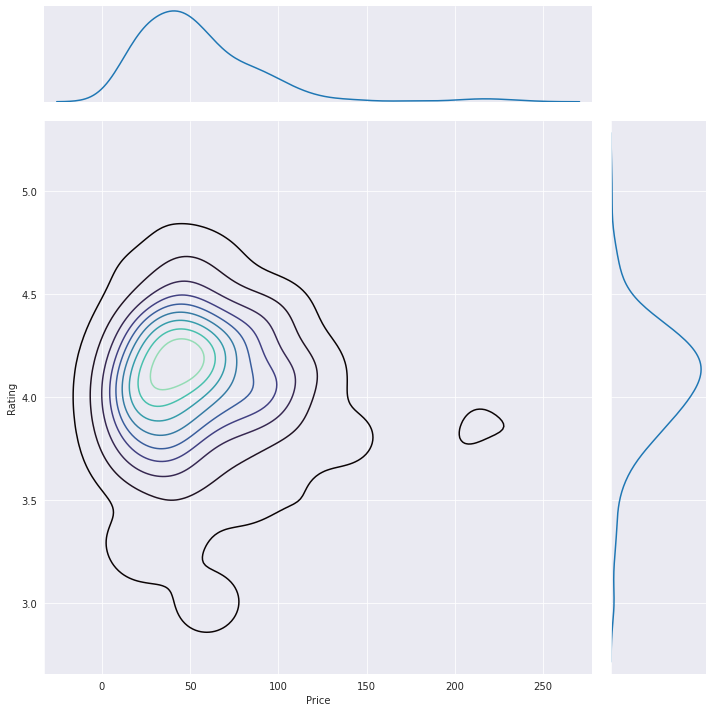

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.jointplot(x=b_data.Price,y=b_data.Rating,height=10,kind='kde',cmap='mako')
#ax.set_xlabel("Price",fontsize=20)
#ax.set_ylabel("Density",fontsize=20)
#ax.set_title('Distribution Of Book Prices',fontsize=21)
plt.show()

### Most of the books in or data set are books in the price range 40-50 USD and rating range 4.0-4.5

<Figure size 1440x792 with 0 Axes>

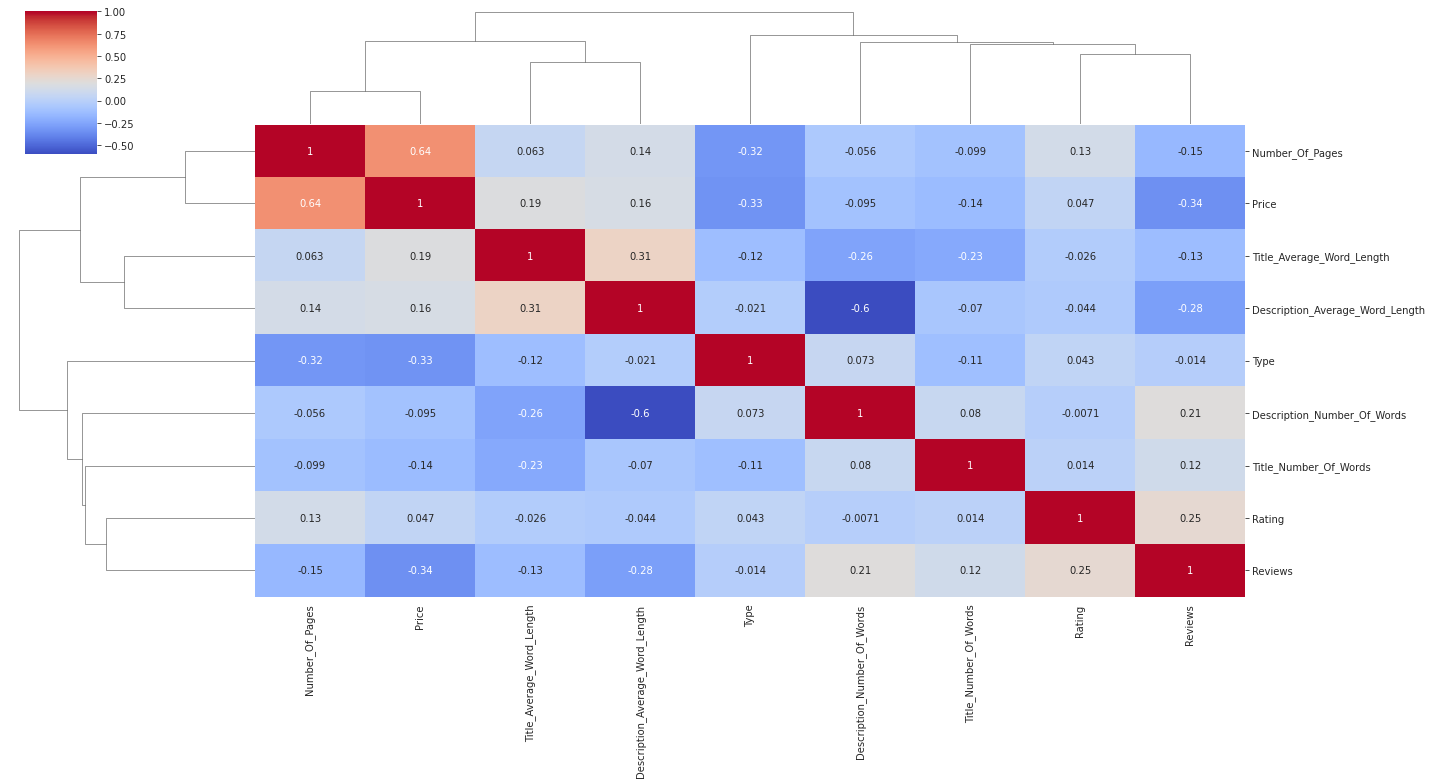

In [ ]:
correlations = b_data.corr('pearson')
plt.figure(figsize=(20,11))
ax = sns.clustermap(correlations,annot=True,cmap='coolwarm',figsize=(20,11))

### We can see that we have some interesting correlations between our price and other features such as the number of reviews and the number of pages. we cannot use the number of reviews as a predictor altough we have a fair correlation with the price feature but it is a classic case of data leakage, we do not know the number of reviews until the book as published, but we can use the number of pages which has a high correlation and the types to estimate a book's price together with the book's type.as for the review scores, there is no significant correlation with any other feature but we will try using nearest neighbor models to approximate the review score.



# Model Selection And Evaluation

### Remove outliers in Number_Of_Pages

In [ ]:
b_data = b_data[b_data['Number_Of_Pages']<1500]
b_data = b_data[b_data['Price']<150]

## Price Prediction

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Text(0.5, 0, 'Fold Number')

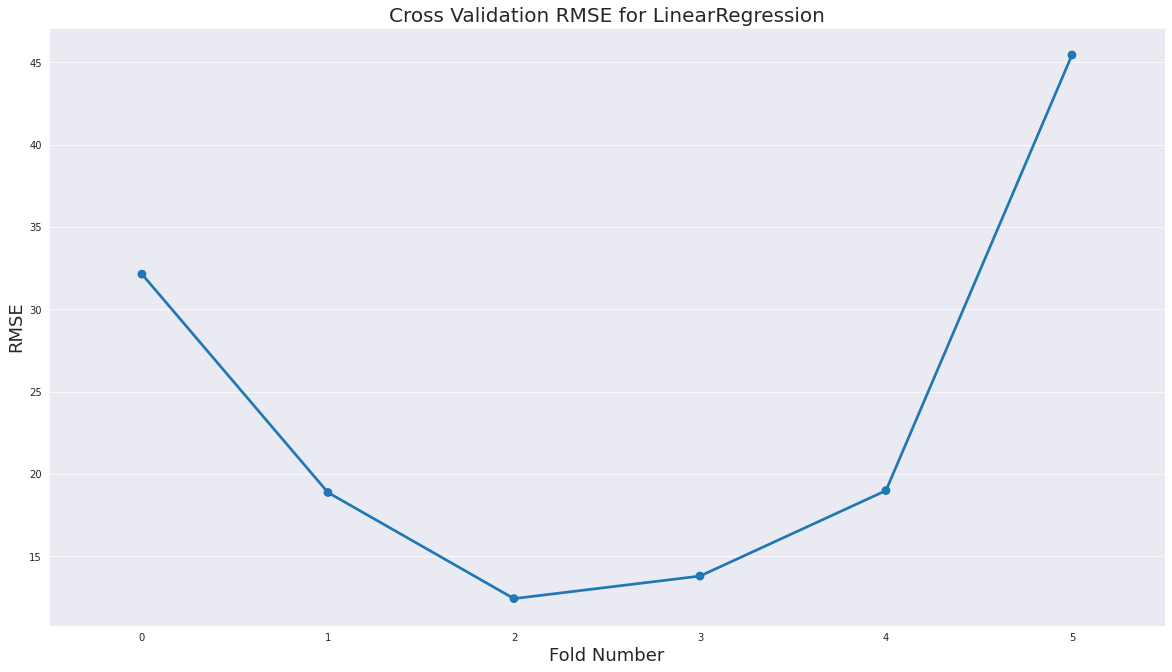

In [ ]:
features = ['Number_Of_Pages','Type','Title_Average_Word_Length']
train_x,test_x,train_y,test_y = train_test_split(b_data[features],b_data.Price)

LR_pipe = Pipeline(steps=[('model',LinearRegression())])

LR_scores = np.sqrt(-1*cross_val_score(LR_pipe,b_data[features],b_data.Price,cv=6,scoring='neg_mean_squared_error'))

plt.figure(figsize=(20,11))
ax = sns.pointplot(x=np.arange(0,6),y=LR_scores)
ax.set_title('Cross Validation RMSE for LinearRegression',fontsize=20)
ax.set_ylabel('RMSE',fontsize=18)
ax.set_xlabel('Fold Number',fontsize=18)

In [ ]:
print("LinearRegression Average Cross Validation Score:",LR_scores.mean())

LinearRegression Average Cross Validation Score: 23.613675319032286


### Can we lower our RMSE using a different model ?

Text(0.5, 0, 'Fold Number')

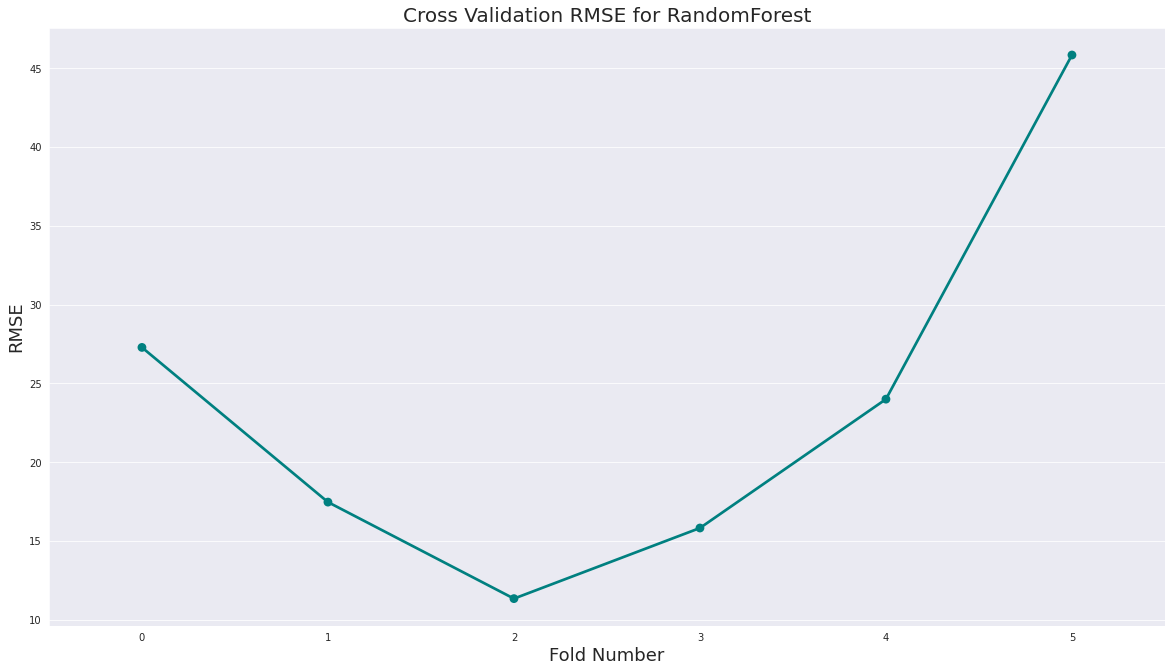

In [ ]:
RF_pipe = Pipeline(steps=[('model',RandomForestRegressor(n_estimators=50,max_leaf_nodes=15,random_state=42))])

RF_scores = np.sqrt(-1*cross_val_score(RF_pipe,b_data[features],b_data.Price,cv=6,scoring='neg_mean_squared_error'))

plt.figure(figsize=(20,11))
ax = sns.pointplot(x=np.arange(0,6),y=RF_scores,color='teal')
ax.set_title('Cross Validation RMSE for RandomForest',fontsize=20)
ax.set_ylabel('RMSE',fontsize=18)
ax.set_xlabel('Fold Number',fontsize=18)

In [ ]:
print("RandomForest Average Cross Validation Score:",RF_scores.mean())

RandomForest Average Cross Validation Score: 23.625224669123668


Text(0.5, 1.0, 'Absolute residuals vs Price')

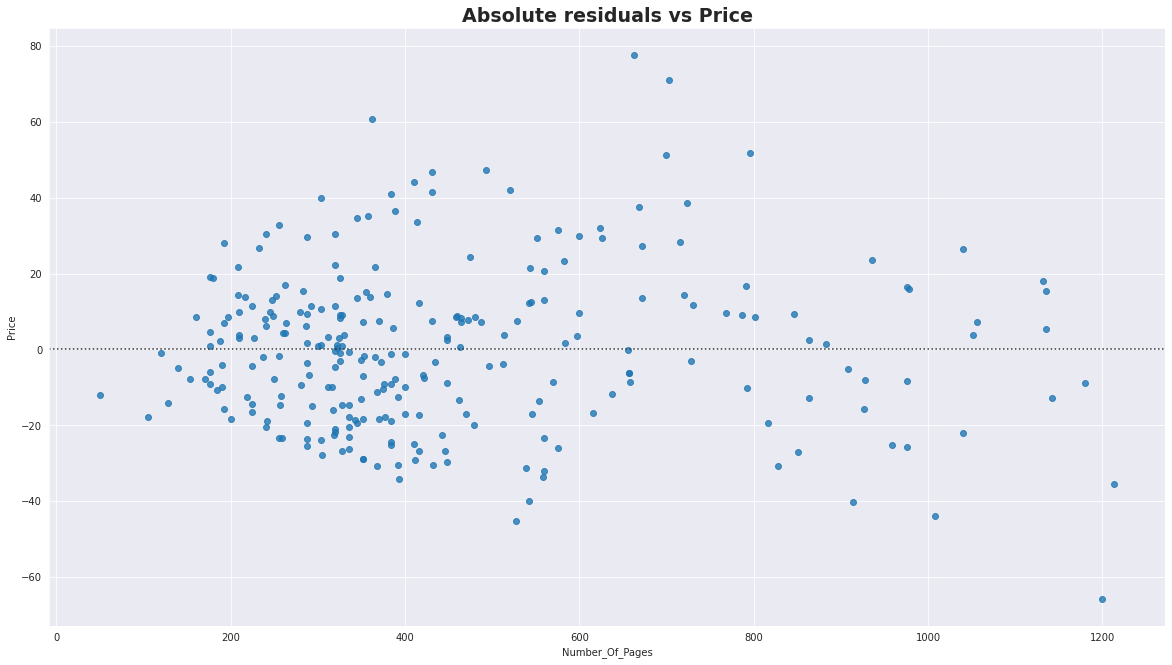

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.residplot(x=b_data.Number_Of_Pages,y=b_data.Price)
ax.set_title('Absolute residuals vs Price',fontsize=19,fontweight='bold')

### We can clearly see that our plot shows a heteroscedastic pattern meaning that regression will do us not good.We will still try polynomial regression for learning purposes. 

### Not a significant change from Linear Regression
### Lets plot and check out how are data is spread maybe a polynomial regression will improve are RMSE

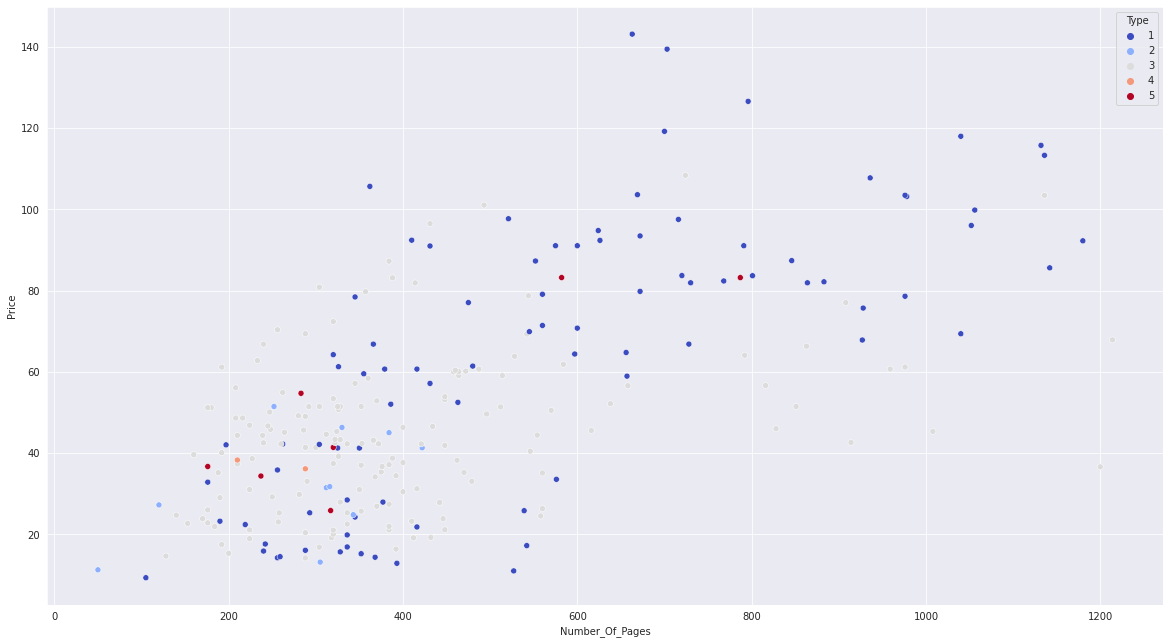

In [ ]:
plt.figure(figsize=(20,11))
ax = sns.scatterplot(x=b_data.Number_Of_Pages,y=b_data.Price,hue=b_data.Type,palette='coolwarm')

### We see that the curve we want to fit is somewhat exponential ,lets try and use Polynomial Regression with a polynomial of a 2 degree 

Text(0.5, 0, 'Fold Number')

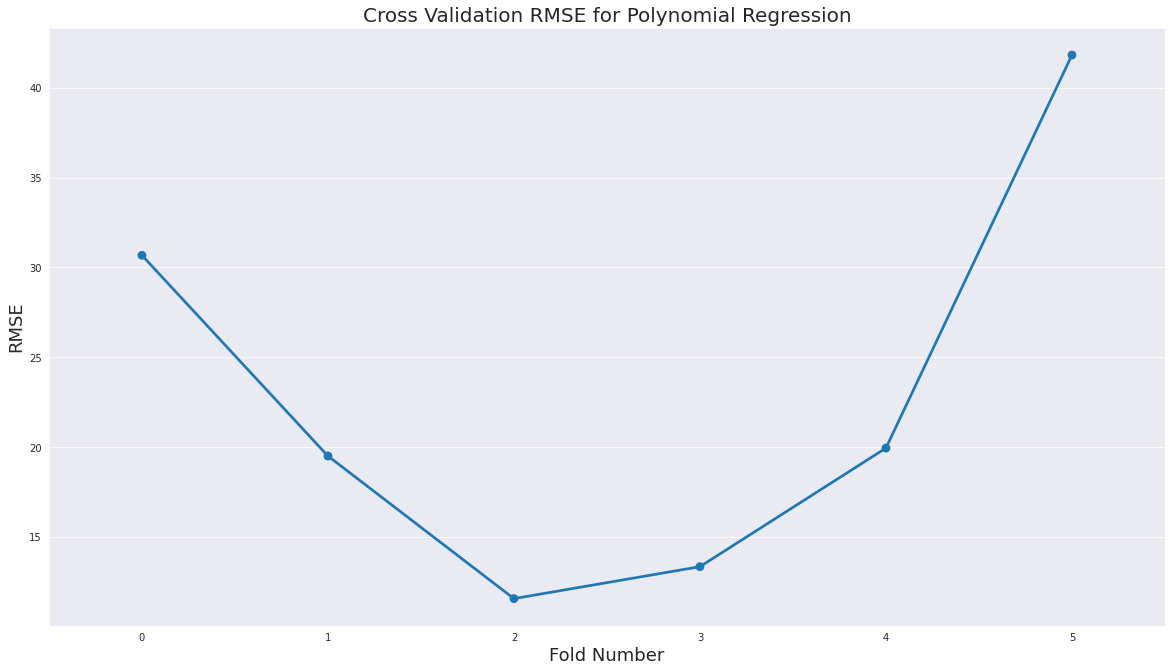

In [ ]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
pf = PolynomialFeatures(degree = 2)
PR_pipe = Pipeline(steps = [('scale',StandardScaler()),('pf',pf), ('model',LinearRegression()) ])



PR_scores = np.sqrt(-1*cross_val_score(PR_pipe,b_data[features],b_data.Price,cv=6,scoring='neg_mean_squared_error'))


plt.figure(figsize=(20,11))
ax = sns.pointplot(x=np.arange(0,6),y=PR_scores)
ax.set_title('Cross Validation RMSE for Polynomial Regression',fontsize=20)
ax.set_ylabel('RMSE',fontsize=18)
ax.set_xlabel('Fold Number',fontsize=18)

In [ ]:
print("Polynomial Regression Average Cross Validation Score:",PR_scores.mean())

Polynomial Regression Average Cross Validation Score: 22.81369815030097


### Polynomial Regression didnt improve our RMSE

Text(0.5, 0, 'Fold Number')

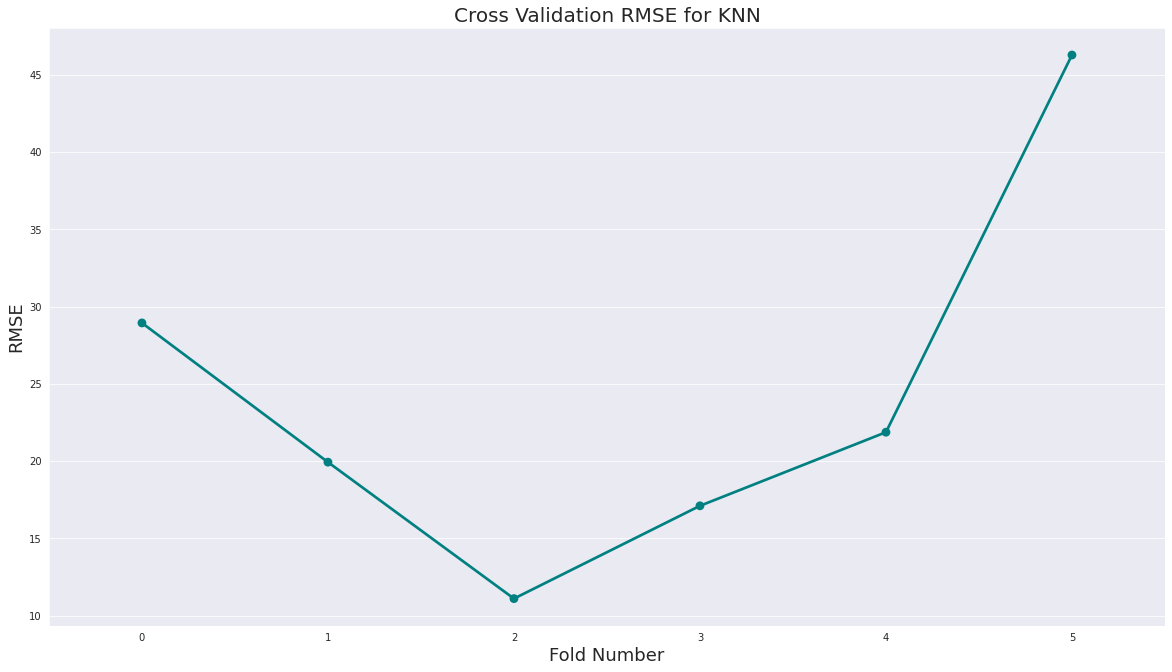

In [ ]:
KNR_pipe = Pipeline(steps=[('model',KNeighborsRegressor(n_neighbors=25))])

KNR_scores = np.sqrt(-1*cross_val_score(KNR_pipe,b_data[features],b_data.Price,cv=6,scoring='neg_mean_squared_error'))

plt.figure(figsize=(20,11))
ax = sns.pointplot(x=np.arange(0,6),y=KNR_scores,color='teal')
ax.set_title('Cross Validation RMSE for KNN',fontsize=20)
ax.set_ylabel('RMSE',fontsize=18)
ax.set_xlabel('Fold Number',fontsize=18)

In [ ]:
print("KNN Average Cross Validation Score:",KNR_scores.mean())

KNN Average Cross Validation Score: 24.200731480923807


### So we tested a few models an we saw that the best RMSE we got was using the good old linear regression , lets train and fit our model and check out will stacking our model result will improve the final RMSE score

In [ ]:
b_data = b_data.sample(frac=1)
LR_pipe.fit(b_data[features],b_data.Price)
PR_pipe.fit(b_data[features],b_data.Price)
KNR_pipe.fit(b_data[features],b_data.Price)
RF_pipe.fit(b_data[features],b_data.Price)

Pipeline(memory=None,
         steps=[('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=15,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False))],
         verbose=False)

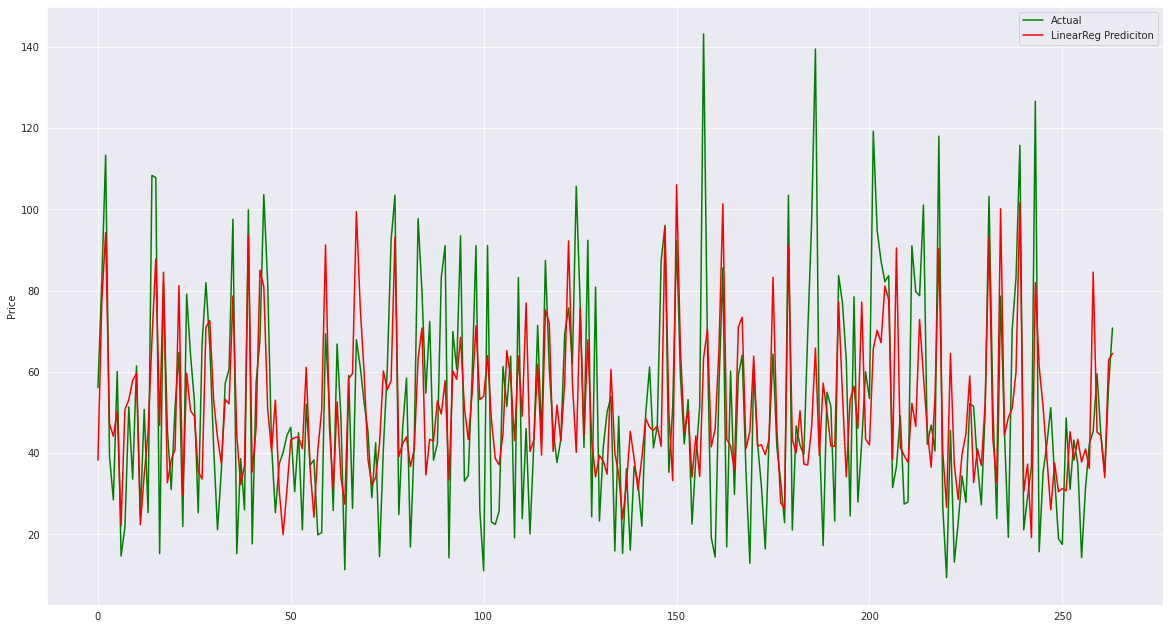

In [ ]:
LR_Predict = LR_pipe.predict(b_data[features])

plt.figure(figsize=(20,11))
ax= sns.lineplot(x=np.arange(0,b_data.shape[0]),y=b_data.Price,label='Actual',color='green')
ax= sns.lineplot(x=np.arange(0,b_data.shape[0]),y=LR_Predict,label='LinearReg Prediciton',color='red')


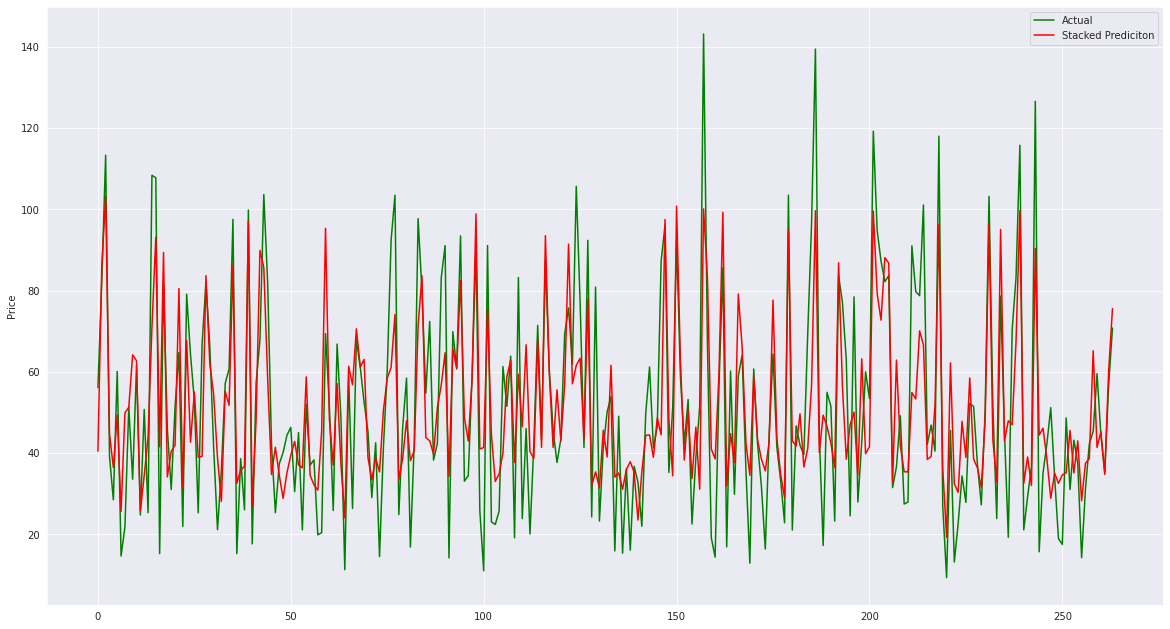

In [ ]:
ens_Predict =LR_pipe.predict(b_data[features])*0.1+PR_pipe.predict(b_data[features])*0.3 + RF_pipe.predict(b_data[features])*0.6

plt.figure(figsize=(20,11))
ax= sns.lineplot(x=np.arange(0,b_data.shape[0]),y=b_data.Price,label='Actual',color='green')
ax= sns.lineplot(x=np.arange(0,b_data.shape[0]),y=ens_Predict,label='Stacked Prediciton',color='red')


In [ ]:
print('Stacked Model RMSE: ',np.sqrt(mean_squared_error(ens_Predict,b_data.Price)))

Stacked Model RMSE:  15.828364300104036
